# FRED 주요 경기 선행 지표

![](https://camo.githubusercontent.com/6243b83a24728bdb058df5d4c730329f69f28a321e2cc1de7551b56192bc9ffa/68747470733a2f2f692e696d6775722e636f6d2f357a704e5264472e706e67)

[Finance Data Reader](https://github.com/FinanceData/FinanceDataReader) 라이브러리를 사용하여 FRED로부터 대표적인 경기 선행 지수 데이터를 가져와 현재 경기의 흐름을 확인합니다.

In [1]:
import torch
import numpy as np
import pandas as pd

In [2]:
# matplotlib 설정
import matplotlib.pyplot as plt

plt.rcParams["axes.grid"] = True
plt.rcParams["figure.figsize"] = (12,6)
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams["axes.formatter.limits"] = -10000, 10000

## 나스닥 지수

우선 나스닥 지수를 확인하겠습니다.

In [3]:
import FinanceDataReader as fdr

df = fdr.DataReader('NASDAQCOM', data_source='fred')
df

,NASDAQCOM
DATE,
1971-02-05,100.00
1971-02-08,100.84
1971-02-09,100.76
1971-02-10,100.69
1971-02-11,101.45
...,...
2022-01-07,14935.90
2022-01-10,14942.83
2022-01-11,15153.45


<AxesSubplot:xlabel='DATE'>

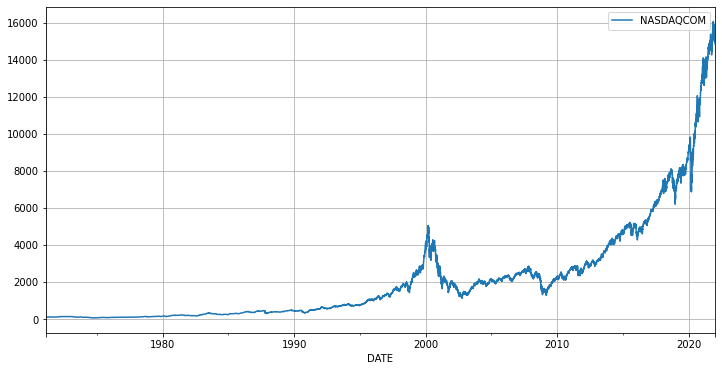

In [4]:
df.plot()

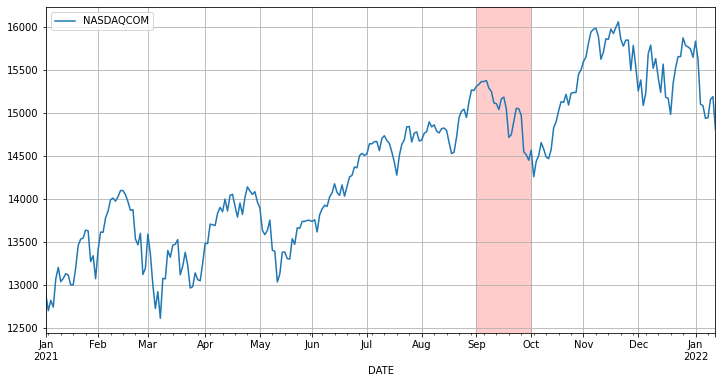

In [5]:
ax = df['2021':].plot()
ax = ax.axvspan('2021-09-01', '2021-10-01', color='red', alpha=0.2)

2021년에 나스닥은 성장세를 이어갔습니다.

3월과 5월 10월에 큰 하락이 있었으나 빠르게 회복했습니다.

그리고 현재(2022년 1월) 다시 하락세를 보이고 있습니다.

이번 하락은 일시적인 조정일지, 폭락의 시작인지 궁금합니다.

## 경기 선행 지표

경기 선행 지표란 경기가 좋아질 것인지, 나빠질 것인지 앞서 반응하는 지표를 말합니다. 대표적인 선행 지표들이 무엇이 있는지, 그리고 이 선행 지표들이 실제로 경기에 선행하고 있는지 확인하고자 합니다.

### 1. 주간 실업수당 청구 건수(ICSA)

사용 데이터 : https://fred.stlouisfed.org/series/ICSA

주단위 신규 실업수당 청구 건수입니다. 실업 수당 청구가 적다는 것은 고용 시장이 안정화되어 있다는 것을 의미합니다. ICSA는 경기가 나빠지는 경우 후행지표로도 동작하지만, 경기가 좋아지는 경우 선행 지표로 활용할 수 있다고 알려져 있습니다.

대표적인 금융위기인 서브프라임 모기지 사태 당시인 2008년 급격하게 상승했음을 확인할 수 있습니다.

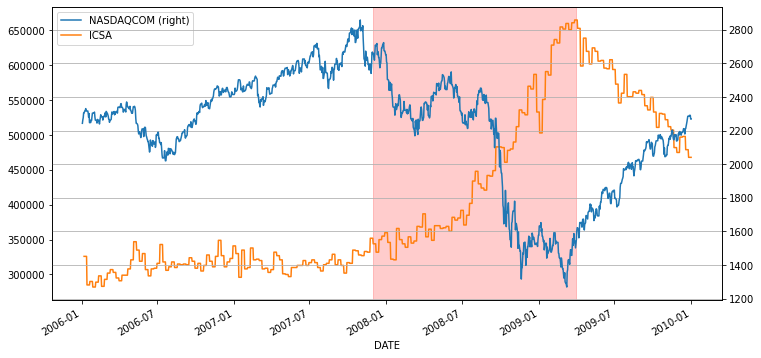

In [6]:
# 2008년 금융위기 나스닥지수(NASDAQCOM)와 주간 실업수당 청구 건수(ICSA)

df = fdr.DataReader(['NASDAQCOM', 'ICSA'], start='2006', end='2010', data_source='fred')
ax = df.plot(secondary_y='NASDAQCOM')
ax = ax.axvspan('2007-12-01', '2009-03-30', color='red', alpha=0.2)

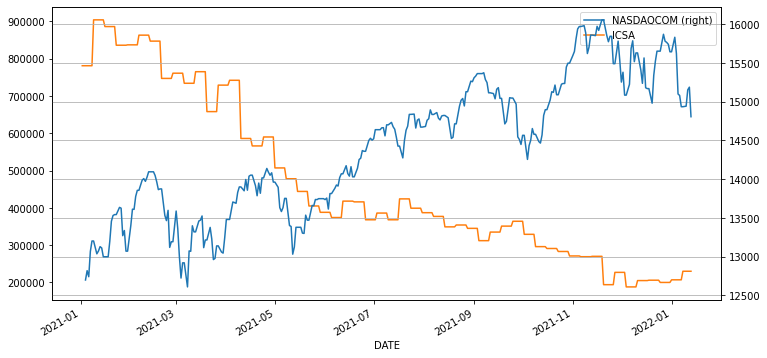

In [7]:
# 최근(2021년 12월), 나스닥지수(NASDAQCOM)와 주간 실업수당 청구 건수(ICSA)

df = fdr.DataReader(['NASDAQCOM', 'ICSA'], start='2021', data_source='fred')
ax = df.plot(secondary_y='NASDAQCOM')

2021년 전반적으로 살펴보면, 주간 실업 수당 청구 건수가 꾸준히 감소하고 있음을 볼 수 있습니다. 변종 바이러스의 확산에도 불구하고 고용시장은 매우 안정되어 있는 것으로 보입니다. 기업들이 해고를 자제하고 있다고 볼 수도 있습니다.

## 2. 소비자 심리 지수(UMCSENT)

https://fred.stlouisfed.org/series/UMCSENT

UMCSENT(University of Michigan : Consumer Sentiment)는 미시건대 소비자 심리 지수 추이로 소비자 심리 지수는 소비자에 대한 설문 결과를 수치화한 지표입니다.

100을 기준으로 그 이상이면 긍정적, 그 이하면 부정적으로 봅니다.

2008년 금융 위기 주가 하락이 본격화 되기 1년 전에 이미 소비자 심리 지수는 하락하고 있음을 뚜렷하게 확인할 수 있습니다.

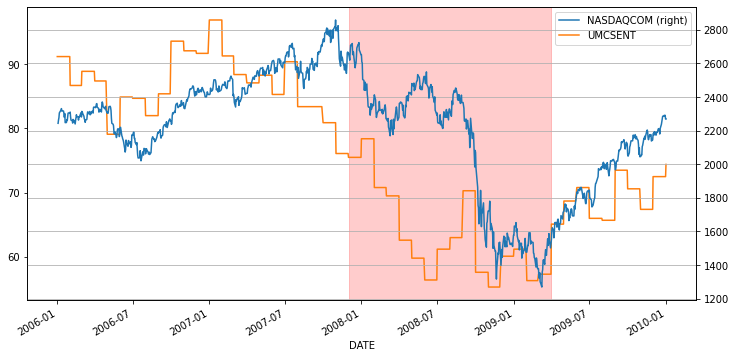

In [8]:
# 2008년 금융위기 나스닥지수(NASDAQCOM)와 미시건대 소비자심리지수(UMCSENT) 

df = fdr.DataReader(['NASDAQCOM', 'UMCSENT'], start='2006', end='2010', data_source='fred')
ax = df.plot(secondary_y='NASDAQCOM')
ax = ax.axvspan('2007-12-01', '2009-03-30', color='red', alpha=0.2)

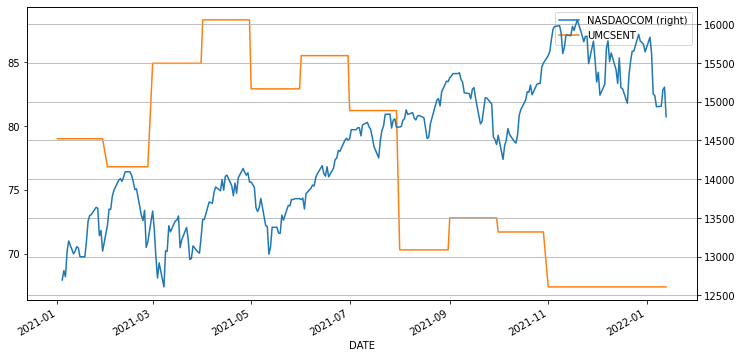

In [9]:
# 최근(2021년 12월), 나스닥지수(NASDAQCOM)와 미시건대 소비자심리지수(UMCSENT) 

df = fdr.DataReader(['NASDAQCOM', 'UMCSENT'], start='2021', data_source='fred')
ax = df.plot(secondary_y='NASDAQCOM')

최근 또다시 소비자 심리 지수는 하락하고 있습니다. 2021년 5월을 기준으로 90점이었던 지수가 2022년 1월 현재 70점 아래까지 하락한 것으로 보아 낙폭도 상당히 큰 상황입니다.

서브프라임 모기지 사태 당시 95점에서 60점까지 35p 하락한 것에도 비견할 수 있을 정도의 낙폭인 바, 이것이 경제 위기의 도래일지, 코로나로 인한 영향일지 예의주시해야할 것입니다.

## 3. 주택 판매 지수(HSN1F)

https://fred.stlouisfed.org/series/HSN1F

주택 판매 지수는 주택시장 활성화 정도를 나타냅니다. 불황으로 주가가 하락할 때 앞서 주택 판매 지수가 하락하는 모습을 보입니다. 그러나 불황과 관계없이 계속 하락했던 전적도 있는 바 순전히 주택 판매 지수로만 경제를 판단하기는 어려워 보입니다.

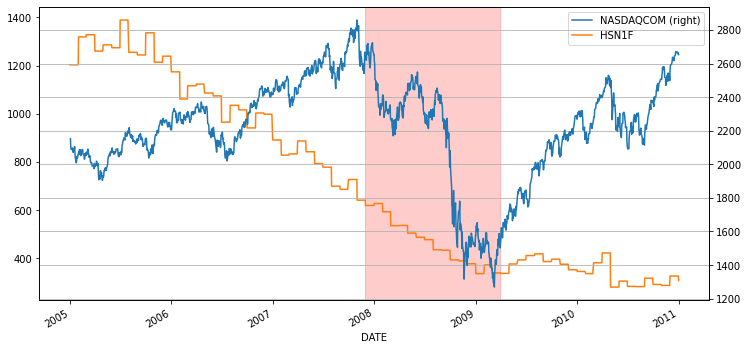

In [10]:
# 2008년 금융위기 나스닥지수(NASDAQCOM)와 주택 판매 지수

df = fdr.DataReader(['NASDAQCOM', 'HSN1F'], start='2005', end='2011', data_source='fred')
ax = df.plot(secondary_y='NASDAQCOM')
ax = ax.axvspan('2007-12-01', '2009-03-30', color='red', alpha=0.2)

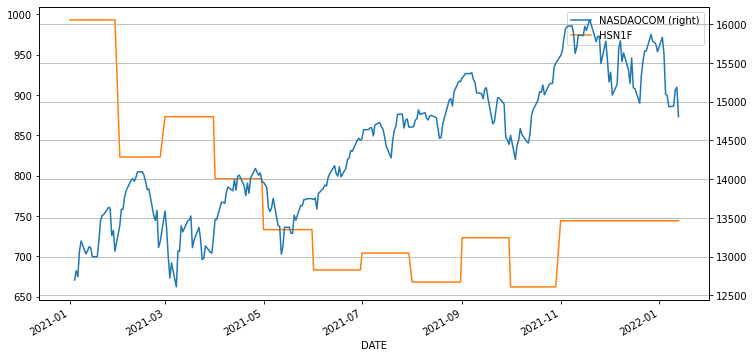

In [11]:
# 최근(2021년 12월), 나스닥지수(NASDAQCOM)와 주택판매지수(HSN1F) 

df = fdr.DataReader(['NASDAQCOM', 'HSN1F'], start='2021', data_source='fred')
ax = df.plot(secondary_y='NASDAQCOM')

In [12]:
df = fdr.DataReader(['NASDAQCOM', 'HSN1F'], start='2007', data_source='fred')

In [13]:
hsn1f2021 = df.loc['2021-01-01', 'HSN1F'] - df.loc['2021-12-31', 'HSN1F']

hsn1f2020 = df.loc['2020-01-01', 'HSN1F'] - df.loc['2020-12-31', 'HSN1F']

hsn1f2019 = df.loc['2019-01-01', 'HSN1F'] - df.loc['2019-12-31', 'HSN1F']

hsn1f2009 = df.loc['2009-01-01', 'HSN1F'] - df.loc['2009-12-31', 'HSN1F']

hsn1f2008 = df.loc['2008-01-01', 'HSN1F'] - df.loc['2008-12-31', 'HSN1F']

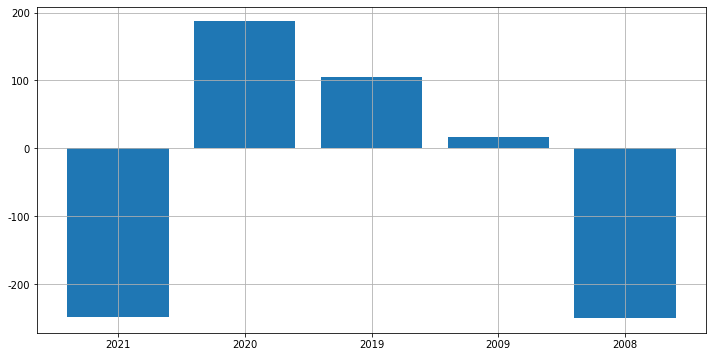

In [14]:
x = np.arange(5)
years = ['2021', '2020', '2019', '2009', '2008']
values = [-hsn1f2021, -hsn1f2020, -hsn1f2019, -hsn1f2009, -hsn1f2008]

plt.bar(x, values)
plt.xticks(x, years)
plt.show()

최근 주택판매지수는 다시 하락하고 있습니다. 그 하락폭도 2008년과 비슷한 정도입니다.

## 4. 실업률(UNRATE)

https://fred.stlouisfed.org/series/UNRATE

실업률은 불황에는 경기 후행 지표, 경기 회복에는 동행 지표로 작동합니다.

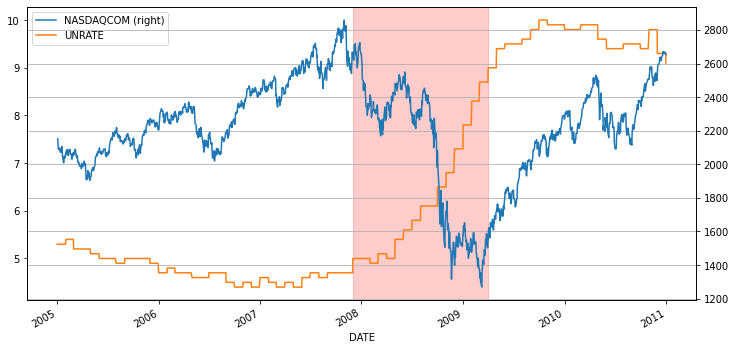

In [15]:
# 2008년 금융위기 나스닥지수(NASDAQCOM)와 실업률(UNRATE) 

df = fdr.DataReader(['NASDAQCOM', 'UNRATE'], start='2005', end='2011', data_source='fred')
ax = df.plot(secondary_y='NASDAQCOM')
ax = ax.axvspan('2007-12-01', '2009-03-30', color='red', alpha=0.2)

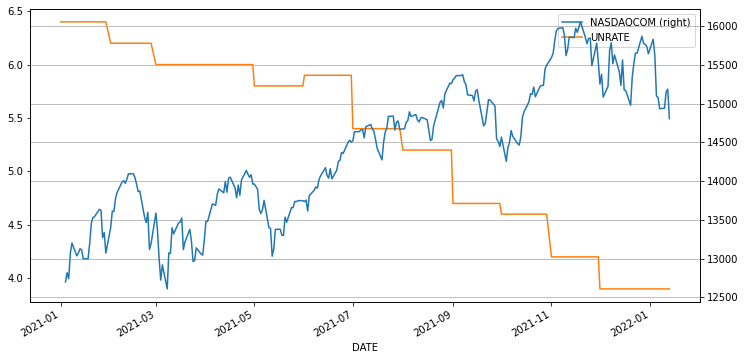

In [16]:
# 최근(2021년 12월), 나스닥지수(NASDAQCOM)와 실업률(UNRATE) 

df = fdr.DataReader(['NASDAQCOM', 'UNRATE'], start='2021', data_source='fred')
ax = df.plot(secondary_y='NASDAQCOM')

주당 실업수당 청구 건수와 마찬가지로 실업률도 역대 최저를 기록하고 있습니다.

코로나로 인해 낮아진 실업률과 낮아진 실업 수당 청구 건수가 안정적인 고용시장을 의미하는지, 단순히 저임급 저품질 노동력의 수요가 많아졌기 때문인지 통찰이 필요합니다.

## 5. M2 통화량(M2)

https://fred.stlouisfed.org/series/M2

시중에 돈이 얼마나 많이 풀렸는지 유동성을 보여주는 지표입니다.

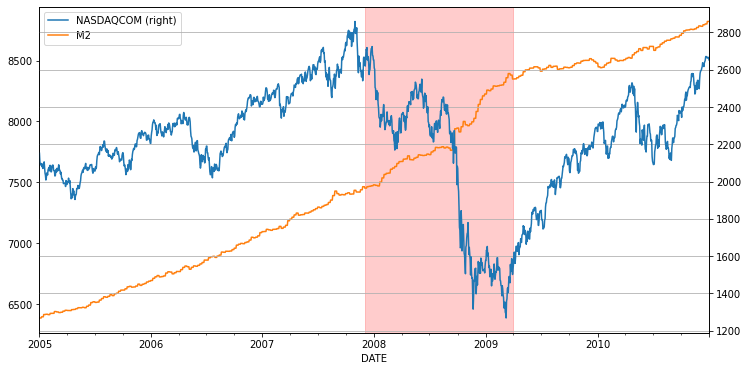

In [17]:
# 2008년 금융위기, 나스닥지수(NASDAQCOM)와 M2통화량(M2) 

df = fdr.DataReader(['NASDAQCOM', 'M2'], start='2005', end='2011', data_source='fred')
ax = df.plot(secondary_y='NASDAQCOM')
ax = ax.axvspan('2007-12-01', '2009-03-30', color='red', alpha=0.2)

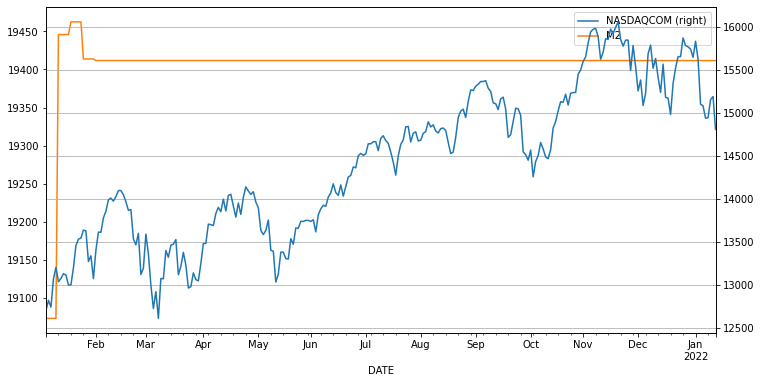

In [18]:
# 최근(2021년 12월), 나스닥지수(NASDAQCOM)와 M2통화량(M2)

df = fdr.DataReader(['NASDAQCOM', 'M2'], start='2021', data_source='fred')
ax = df.plot(secondary_y='NASDAQCOM')

현재 유동성이 2021년 2월 이후에 같은 값으로 유지되는 것을 볼 수 있습니다.
이것이 FRED에 기록되지 않았기 때문인지, 실제로 같은 값으로 유지되고 있는지 알아볼 필요가 있겠습니다.

# 인사이트

- 최근 나스닥 지수도 하락세를 보이고 있습니다.
- 주간 실업수당 청구 건수와 실업률은 계속 낮아지고 있습니다. (긍정적?)
- 소비자 심리 지수와 주택 판매지수는 역대급의 낙폭을 보이고 있습니다. (매우 부정적)

Reference:
[Finance Data.KR](https://notebooks.githubusercontent.com/view/ipynb?browser=chrome&color_mode=auto&commit=b28bfb5f802f7ad5ad8012a59c32553225e40040&device=unknown_device&enc_url=68747470733a2f2f7261772e67697468756275736572636f6e74656e742e636f6d2f46696e616e6365446174612f46696e616e6365446174615265616465722f623238626662356638303266376164356164383031326135396333323535333232356534303034302f7475746f7269616c2f46696e616e6365446174615265616465722532305475746f7269616c2532302d253230465245442532302545412542322542442545412542382542302532302545432538342541302545442539362538392532302545432541372538302545442539312539432e6970796e62&logged_in=true&nwo=FinanceData%2FFinanceDataReader&path=tutorial%2FFinanceDataReader+Tutorial+-+FRED+%EA%B2%BD%EA%B8%B0+%EC%84%A0%ED%96%89+%EC%A7%80%ED%91%9C.ipynb&platform=linux&repository_id=130222943&repository_type=Repository&version=97)